In [3]:
import numpy as np # linear algebra
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
%matplotlib inline
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

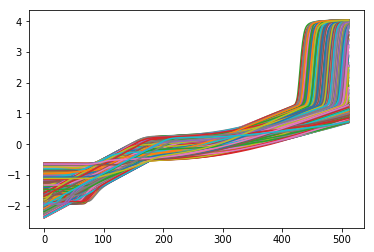

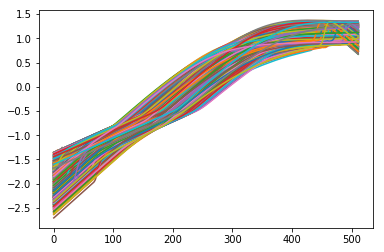

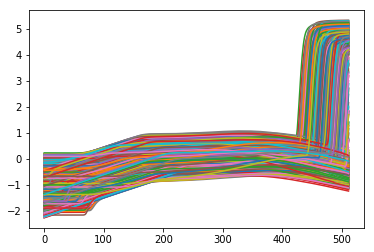

(1000, 512, 3) (1000, 3) (250, 512, 3) (250, 3)


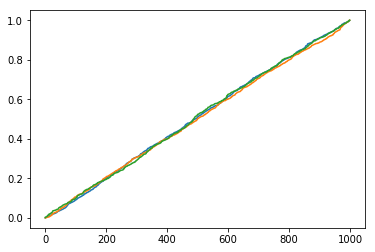

In [4]:
x_train=np.loadtxt('X_train.csv',delimiter=',')
y_train=np.loadtxt('Y_train.csv',delimiter=',')
x_test=np.loadtxt('X_test.csv',delimiter=',')
y_test=np.loadtxt('Y_test.csv',delimiter=',')

x_train=np.reshape(x_train,(-1,512,3))
x_test=np.reshape(x_test,(-1,512,3))

for i in range(3):
    mean=np.mean(x_train[:,:,i])
    std=np.std(x_train[:,:,i])
    x_train[:,:,i]=(x_train[:,:,i]-mean)/std
    x_test[:,:,i]=(x_test[:,:,i]-mean)/std
#x_train=np.expand_dims(x_train, axis=2)
#x_test=np.expand_dims(x_test, axis=2)

plt.plot(np.transpose(x_train[:,:,0]))
plt.show()
plt.plot(np.transpose(x_train[:,:,1]))
plt.show()
plt.plot(np.transpose(x_train[:,:,2]))
plt.show()
y_train=np.log10(y_train)
y_test=np.log10(y_test)
y_train[:,1]=y_train[:,1]+1
y_test[:,1]=y_test[:,1]+1
y_train[:,2]=y_train[:,2]/2
y_test[:,2]=y_test[:,2]/2
'''max=np.max(y_train,axis=0)
y_train=y_train/max
y_test=y_test/max'''
for i in range(3):
    plt.plot(np.sort(y_train[:,i]))

print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))

/home/vinit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


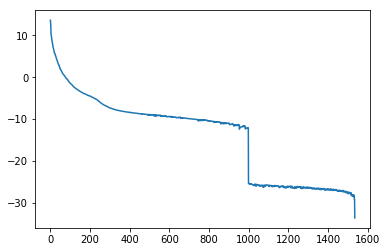

(1000, 3)


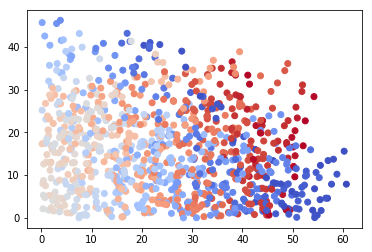

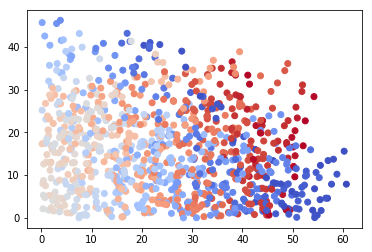

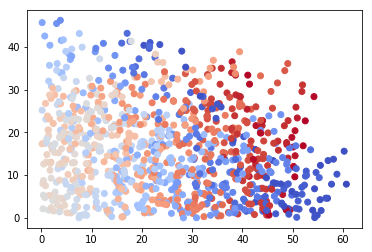

'\nax = plt.figure().add_subplot(111, projection=\'3d\')\nax.scatter(Z[:,0],Z[:,1],Z[:,2], c=y_train[:,0], cmap="coolwarm")\n#plt.savefig(\'Sigma_PCA.png\')\nplt.show()\n\nax = plt.figure().add_subplot(111, projection=\'3d\')\nax.scatter(Z[:,0],Z[:,1], c=y_train[:,1], cmap="coolwarm")\n#plt.savefig(\'Eth_PCA.png\')\nplt.show()\n\nax = plt.figure().add_subplot(111, projection=\'3d\')\nax.scatter(Z[:,1],Z[:,2], c=y_train[:,2], cmap="coolwarm")\n#plt.savefig(\'Slope_PCA.png\')\nplt.show()\n'

In [5]:
#Data Analysis
X = np.reshape(np.transpose(x_train,(0,2,1)),(-1,512*3))
X=(X-np.mean(X,axis=0))/np.std(X,axis=0)
X_=np.matrix.transpose(X)

lambd,W=np.linalg.eig(np.matmul(X_,X))

plt.plot(np.log(lambd))
plt.show()

Z=np.abs(np.matmul(X,W[:,:3]))
print(np.shape(Z))

for i in range(3):
    plt.scatter(Z[:,0],Z[:,1], c=y_train[:,0], cmap="coolwarm")
    plt.show()

'''
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(Z[:,0],Z[:,1],Z[:,2], c=y_train[:,0], cmap="coolwarm")
#plt.savefig('Sigma_PCA.png')
plt.show()

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(Z[:,0],Z[:,1], c=y_train[:,1], cmap="coolwarm")
#plt.savefig('Eth_PCA.png')
plt.show()

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(Z[:,1],Z[:,2], c=y_train[:,2], cmap="coolwarm")
#plt.savefig('Slope_PCA.png')
plt.show()
'''

In [6]:
model = Sequential()

model.add(Conv1D(filters = 30, kernel_size = 6, activation='relu', input_shape = (512,3)))
model.add(BatchNormalization())
model.add(Conv1D(filters = 30, kernel_size = 6, activation='relu'))
model.add(BatchNormalization())
#model.add(Conv1D(filters = 16, kernel_size = 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool1D(strides=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters = 60, kernel_size = 6, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(filters = 60, kernel_size = 6, activation='relu'))
model.add(BatchNormalization())
#model.add(Conv1D(filters = 32, kernel_size = 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool1D(strides=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(2048, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4046, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(2048, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(3, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 507, 30)           570       
_________________________________________________________________
batch_normalization_1 (Batch (None, 507, 30)           120       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 502, 30)           5430      
_________________________________________________________________
batch_normalization_2 (Batch (None, 502, 30)           120       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 251, 30)           0         
_________________________________________________________________
dropout_1 (Dropout)  

In [7]:
model.compile(loss='binary_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"]) #mean_squared_error

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_test, y_test), #For speed
                           callbacks=[annealer])

Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 250 samples
Epoch 1/20
 - 12s - loss: 1.5700 - acc: 0.0000e+00 - val_loss: 4.6155 - val_acc: 0.0000e+00
Epoch 2/20
 - 5s - loss: 3.4016 - acc: 0.0000e+00 - val_loss: 3.2940 - val_acc: 0.0000e+00
Epoch 3/20
 - 4s - loss: 1.8516 - acc: 0.0000e+00 - val_loss: 3.3224 - val_acc: 0.0000e+00
Epoch 4/20
 - 4s - loss: 1.2738 - acc: 0.0000e+00 - val_loss: 2.3079 - val_acc: 0.0000e+00
Epoch 5/20
 - 4s - loss: 0.9086 - acc: 0.0000e+00 - val_loss: 1.7012 - val_acc: 0.0000e+00
Epoch 6/20
 - 4s - loss: 0.7970 - acc: 0.0000e+00 - val_loss: 1.2631 - val_acc: 0.0000e+00
Epoch 7/20
 - 4s - loss: 0.7127 - acc: 0.0000e+00 - val_loss: 1.1256 - val_acc: 0.0000e+00
Epoch 8/20
 - 4s - loss: 0.6732 - acc: 0.0000e+00 - val_loss: 0.8757 - val_acc: 0.0000e+00
Epoch 9/20
 - 4s - loss: 0.6386 - acc: 0.0000e+00 - val_loss: 0.7006 - val_acc: 0.0000e+00
Epoch 10/20
 - 4s - loss: 0.6225 - acc: 0.0000e+00 - val_loss: 0.6527 - val_acc: 0.00

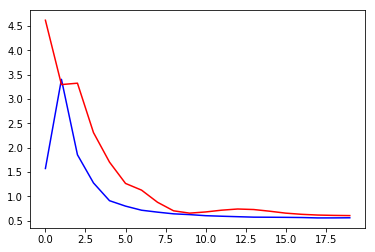

In [8]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

In [9]:
model.evaluate(x_test, y_test)

250/250 [==============================] - 0s 1ms/step


[0.6021808166503906, 0.0]

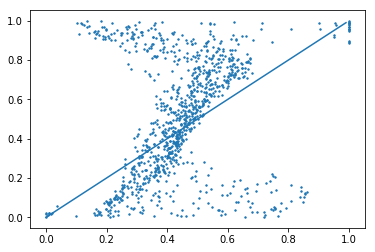

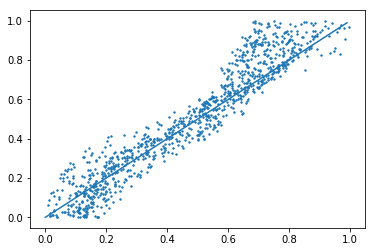

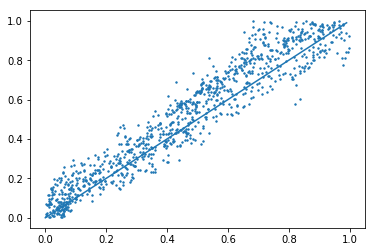

In [10]:
for i in range(3):
    plt.scatter(model.predict(x_train)[:,i],y_train[:,i],s=2)
    plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
    plt.show()

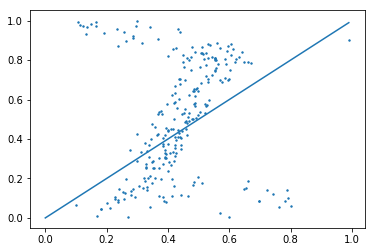

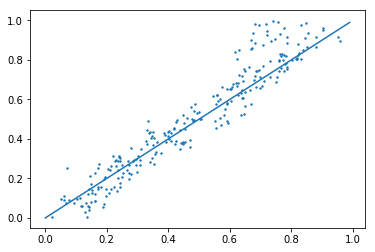

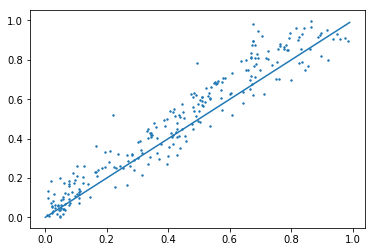

In [11]:
for i in range(3):
    plt.scatter(model.predict(x_test)[:,i],y_test[:,i],s=2)
    plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
    plt.show()